In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import figure_ground_analysis as fg
reload(fg)
import pdb

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
ret = {}
paramdict = {}
pval = {}
trialrun = {}
nbydepth = {}
spont = {}

In [3]:
# folds = []
# files = []
# rets = []
# adjust_fns = []

# def tack_on(thisfold,thisfile,retnumber,frame_adjust=None):
#     folds.append(thisfold)
#     files.append(thisfile)
#     rets.append(retnumber)
#     adjust_fns.append(frame_adjust)

# thisfold = '170808/M7194/'
# thisfile = 'M7194_999_000'
# retnumber = '000'
# tack_on(thisfold,thisfile,retnumber)
    
# thisfold = '180327/M8570/'
# thisfile = 'M8570_151_002'
# retnumber = '000'
# frame_adjust = lambda x: np.delete(np.delete(x,990),0)
# tack_on(thisfold,thisfile,retnumber,frame_adjust)

folds = []
files = []
rets = []
adjust_fns = []
rgs = []
criteria = []
datafoldbases = []


def tack_on(thisfold,thisfile,retnumber,frame_adjust=None,rg=(1,0),criterion=lambda x: np.abs(x)>100,datafoldbase=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)
    rgs.append(rg)
    criteria.append(criterion)
    datafoldbases.append(datafoldbase)
    

# thisfold = '180530/M8174/'
# thisfile = 'M8174_130_003'
# retnumber = '002'
# criterion = lambda x: np.abs(x)>100
# rg = (1,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,criterion=criterion)

# thisfold = '180220/M7254/'
# thisfile = 'M7254_150_005'
# retnumber = '000'
# datafoldbase = '/home/mossing/scratch/2Pdata/'
# tack_on(thisfold,thisfile,retnumber,datafoldbase=datafoldbase)

# thisfold = '180216/M7307/'
# thisfile = 'M7307_120_003'
# retnumber = '000'
# rg = (1,-1)
# tack_on(thisfold,thisfile,retnumber,rg=rg)

thisfold = '181209/M8536/'
thisfile = 'M8536_165_004'
retnumber = '002'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

# thisfold = '181213/M8536/' # HAVEN'T MADE ROIS YET FOR THIS
# thisfile = 'M8536_155_003'
# retnumber = '001'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
# rg = (1,0)
# frame_adjust = lambda x: np.delete(x,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

# thisfold = '181214/M10130/' # HAVEN'T MADE ROIS YET FOR THIS
# thisfile = 'M10130_135_003'
# retnumber = '001'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
# rg = (1,0)
# frame_adjust = lambda x: np.delete(x,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190128/M8982/'
thisfile = 'M8982_200_004'
retnumber = '002'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190130/M9667/'
thisfile = 'M9667_135_003'
retnumber = '001'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190131/M9355/'
thisfile = 'M9355_165_003'
retnumber = '001'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,-1)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190208/M9355/'
thisfile = 'M9355_175_005'
retnumber = '003'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190212/M8536/'
thisfile = 'M8536_150_006'
retnumber = '004'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

In [4]:
procname = 'procfiles/pyr_l23_figure_ground_proc.hdf5'
dsname = '../shared_data/pyr_l23_data_struct.hdf5'
if os.path.exists(procname):
    os.remove(procname)
import analysis_template as at
#reload(at)
reload(fg)
keylist = fg.analyze_simply(folds,files,rets,adjust_fns,rgs,datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',procname=procname)
with h5py.File(procname,mode='r') as proc:
    grouplist = fg.add_data_struct_h5_simply(dsname,cell_type='PyrL23', keylist=keylist, frame_rate_dict=None, proc=proc, nbefore=8, nafter=8)

/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_000.rois
(412, 3291)


/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:797: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_001.rois
(401, 3291)
/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_002.rois
(418, 3291)
/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_003.rois
(457, 3291)
roi 412 all zeros


/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:164: RuntimeWarning: invalid value encountered in multiply
  penalty=penalty, **kwargs)


no mean image data for /home/mossing/modulation/visual_stim/181209/M8536/M8536_165_004.mat
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_000.rois
(278, 6369)
roi 134 all zeros
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_001.rois
(357, 6369)
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_002.rois
(313, 6369)
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_003.rois
(396, 6369)
no mean image data for /home/mossing/modulation/visual_stim/190128/M8982/M8982_200_004.mat
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_000.rois
(343, 6347)
roi 150 all zeros
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_001.rois
(355, 6347)
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_002.rois
(348, 6347)
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_003.rois
(270, 6347)
no mean image data for /home/mossing/modulation/visual_stim/190130/M9667/M9667_135_003.mat
/me

In [1]:
#reload(fg)
## soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth = fg.analyze_everything(folds,files,rets,adjust_fns)
#soriavg,proc = fg.analyze_everything_by_criterion(folds,files,rets,[None]*len(folds),datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',rgs=rgs)

In [58]:
keylist = list(proc.keys())

In [59]:
reload(fg)
data_struct = fg.gen_full_data_struct(proc=proc,keylist=keylist)

In [66]:
keylist = list(data_struct.keys())

In [61]:
data_struct[keylist[0]]['F'].shape

(1688, 400, 12)

In [62]:
k = 0

In [63]:
order = data_struct[keylist[k]]['order']
order

['ctrl', 'fig', 'grnd', 'iso', 'cross']

In [89]:
ncells = data_struct[keylist[k]]['F'].shape[0]
nangle = 8

In [181]:
lkat = np.logical_and(data_struct[keylist[k]]['rf_distance_deg']<10,data_struct[keylist[k]]['rf_mapping_pval']<0.05)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [222]:
def scatter_two_means(grp1,grp2,k=0,alpha=0.01):
    lkat = np.logical_and(data_struct[keylist[k]]['rf_distance_deg']<10,data_struct[keylist[k]]['rf_mapping_pval']<0.05)
    plt.scatter(data_struct[keylist[k]]['F'][lkat][:,grp1][:,:,4:-4].mean(-1).mean(-1),data_struct[keylist[k]]['F'][lkat][:,grp2][:,:,4:-4].mean(-1).mean(-1),alpha=alpha)
    plt.xlim(0,0.2)
    plt.ylim(0,0.2)
    plt.plot((0,0.2),(0,0.2),c='r')
    

In [223]:
def define_trials(k):
    center = data_struct[keylist[k]]['stimulus_id'][0] == 1
    ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
    iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
    cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
    return center,ground,iso,cross

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Text(0,0.5,'cross')

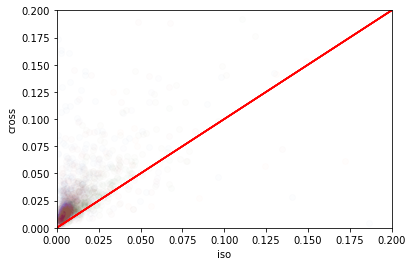

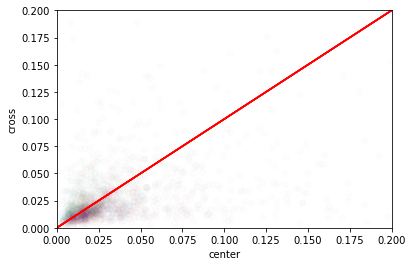

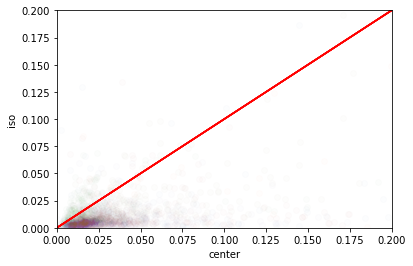

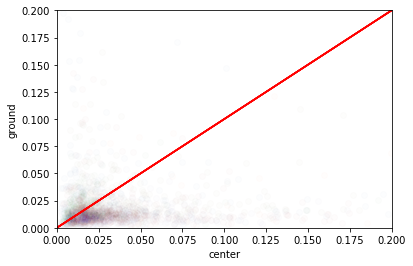

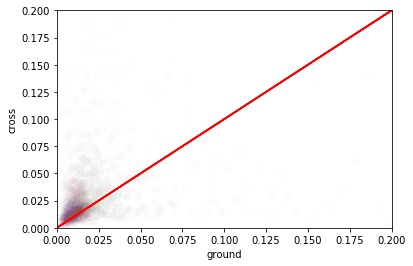

In [225]:
plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(iso,cross,k=k)
plt.xlabel('iso')
plt.ylabel('cross')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,cross,k=k)
plt.xlabel('center')
plt.ylabel('cross')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,iso,k=k)
plt.xlabel('center')
plt.ylabel('iso')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,ground,k=k)
plt.xlabel('center')
plt.ylabel('ground')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(ground,cross,k=k)
plt.xlabel('ground')
plt.ylabel('cross')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Text(0,0.5,'cross')

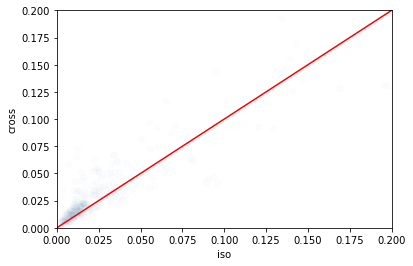

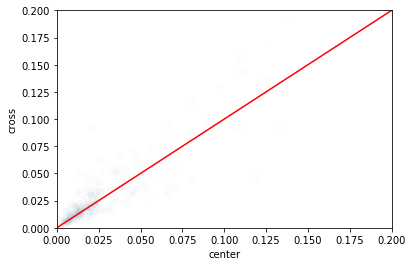

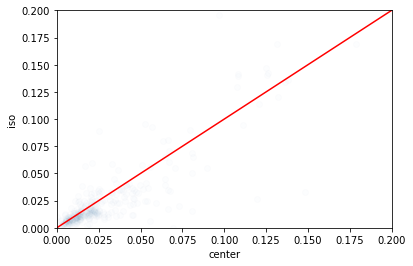

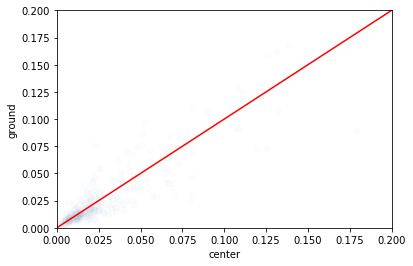

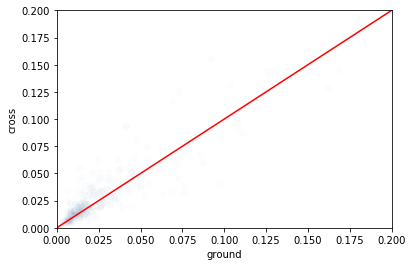

In [226]:
plt.figure()
scatter_two_means(iso,cross)
plt.xlabel('iso')
plt.ylabel('cross')

plt.figure()
scatter_two_means(center,cross)
plt.xlabel('center')
plt.ylabel('cross')

plt.figure()
scatter_two_means(center,iso)
plt.xlabel('center')
plt.ylabel('iso')

plt.figure()
scatter_two_means(center,ground)
plt.xlabel('center')
plt.ylabel('ground')

plt.figure()
scatter_two_means(ground,cross)
plt.xlabel('ground')
plt.ylabel('cross')

(0, 0.2)

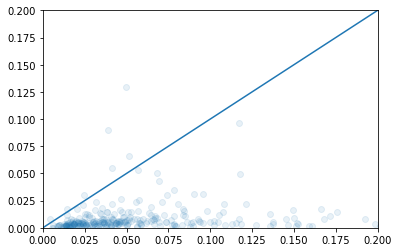

In [188]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,iso][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.1)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)


In [227]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,cross][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.1)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 959 but corresponding boolean dimension is 1688

In [228]:
interesting = F1+F2<F3

In [229]:
k = 0

In [230]:
ori_tuning = np.zeros((ncells,nangle,5))
ori_lb = np.zeros((ncells,nangle,5))
ori_ub = np.zeros((ncells,nangle,5))
for i in range(nangle):
    for j in range(5):
        thisangle = np.logical_and(data_struct[keylist[k]]['stimulus_id'][0]==j,data_struct[keylist[k]]['stimulus_id'][1]==i*45)
        tavg = np.nanmean(data_struct[keylist[k]]['F'][:,thisangle][:,:,4:-4],-1)
        for ii in range(tavg.shape[0]):
            ori_lb[ii,i,j],ori_ub[ii,i,j] = ut.bootstrap(tavg[ii],np.nanmean,axis=0,pct=(16,84))
        ori_tuning[:,i,j] = np.nanmean(tavg,-1)

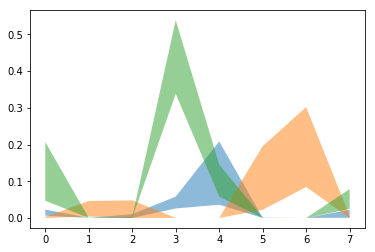

In [231]:
plt.figure()
ind = 7
def plot_center_ground_cross(ind):
    for which in (1,2,4):
        plt.fill_between(np.arange(8),ori_lb[lkat][interesting][ind,:,which],ori_ub[lkat][interesting][ind,:,which],alpha=0.5)
        
plot_center_ground_cross(7)

In [196]:
indmax = interesting.sum()

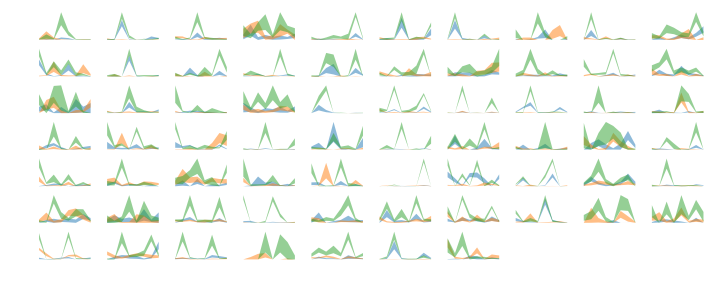

In [197]:
plt.figure(figsize=(12,12))
for i in range(indmax):
    plt.subplot(18,10,i+1)
    plot_center_ground_cross(i)
    plt.axis('off')

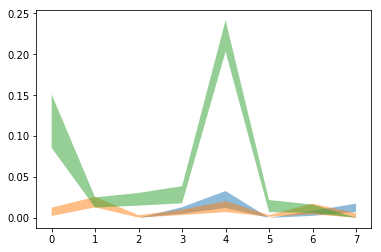

In [198]:
plot_center_ground_cross(18)